In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Price_prediction_project'

/content/drive/MyDrive/Price_prediction_project


In [ ]:
import pandas as pd 

In [ ]:
test = pd.read_csv("./test.tsv",sep='\t')
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [ ]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [ ]:
train = pd.read_csv("./train.tsv",sep='\t')
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [ ]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [ ]:
#test.describe()
#test.isna().sum()/693359

In [ ]:
train.isna().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [ ]:
train.isna().sum()/1482535

train_id             0.000000
name                 0.000000
item_condition_id    0.000000
category_name        0.004268
brand_name           0.426757
price                0.000000
shipping             0.000000
item_description     0.000003
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


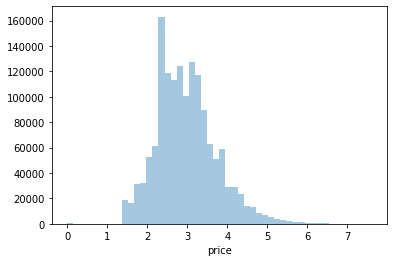

In [ ]:
import seaborn as sns
import numpy as np

sns.distplot(np.log1p(train['price']), kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


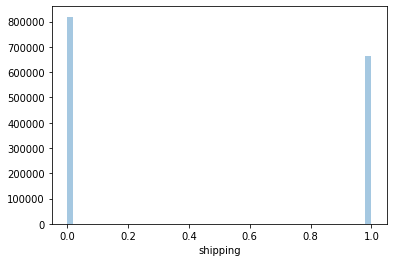

In [ ]:
sns.distplot(train['shipping'], kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


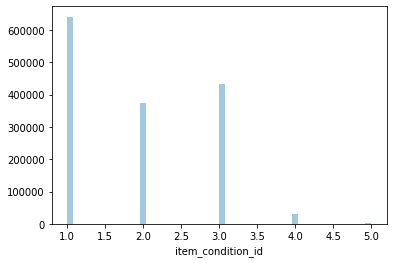

In [ ]:
sns.distplot(train['item_condition_id'], kde=False)

Preparing categories

In [ ]:
train_copy = train.copy()

In [ ]:
#Checking for NULL values in the columns
train_copy.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [ ]:
to_remove = train_copy['item_description'][0]

In [ ]:
pad_symbol = "<PAD>"

In [ ]:
train_copy = train.copy()

unknown_symbol = "<UNKNOWN>"

def split_category_name(text):
  if isinstance(text, str):
    return text.split("/")
  else:
    return [unknown_symbol]

def process_brand(text):
  if isinstance(text, str):
    return text
  else:
    return unknown_symbol

def process_descr(text, t):
  if isinstance(text, str) and text!=t:
    return text
  else:
    return unknown_symbol    

train_copy['category_name'] = train_copy['category_name'].apply(lambda x: split_category_name(x))
train_copy['brand_name'] = train_copy['brand_name'].apply(lambda x: process_brand(x))
no_descr = "No description yet "
train_copy['item_description'] = train_copy['item_description'].apply(lambda x: process_descr(x, to_remove))


train_copy.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,"[Men, Tops, T-shirts]",<UNKNOWN>,10.0,1,<UNKNOWN>
1,1,Razer BlackWidow Chroma Keyboard,3,"[Electronics, Computers & Tablets, Components ...",Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,"[Women, Tops & Blouses, Blouse]",Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,"[Home, Home Décor, Home Décor Accents]",<UNKNOWN>,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,"[Women, Jewelry, Necklaces]",<UNKNOWN>,44.0,0,Complete with certificate of authenticity


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def tokenize(sentences):

  tokenizer = Tokenizer(oov_token='UNK')
  tokenizer.fit_on_texts(sentences)

  word_index = tokenizer.word_index
  vocab_size=len(word_index)

  sequences = tokenizer.texts_to_sequences(sentences)
  max_sequence_len = max([len(x) for x in sequences])
  padded = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')

  return padded, word_index


In [ ]:
padded_name, dic_name = tokenize(train_copy['name'])
train_copy['name'] = padded_name

17


In [ ]:
padded_description, dic_description = tokenize(train_copy['item_description'])
train_copy['item_description'] = padded_description

In [ ]:
train_copy['category_name']

In [ ]:
def categories_dict_indx(categories):

  cat_set = set()
  max_cat_len = max( [len(c) for c in categories] )

  for cats in categories:
    for cat in cats:
      cat_set.add(cat)

  cat_set.add(pad_symbol)
  cat_dict = { c:i for (i, c) in enumerate(cat_set) }

  cat_indexed = []

  for cats in categories:
    cat_array = []
    for cat in cats:
      cat_array.append(cat_dict[cat])
    
    while len(cat_array) < max_cat_len:
      cat_array.append(cat_dict[pad_symbol])

    cat_indexed.append(cat_array)
    
      

  return cat_indexed, cat_dict

categories_dict_indx(train_copy['category_name'])

In [ ]:
def brand_dict_indx(brand):

  brand_set = set()
 
  for b in brand:
      brand_set.add(b)

  brand_dict = { c:i for (i, c) in enumerate(brand_set) }

  brand_indexed = []

  for b in brand:
    brand_indexed.append(brand_dict[b])

  return brand_indexed, brand_dict

brand_dict_indx(train_copy['brand_name'])

In [ ]:
#SGDRegressor

model_lr_best_param = SGDRegressor(loss = "squared_loss",alpha = best_parameters_lr['alpha'],\
                                   fit_intercept=False)
model_lr_best_param.fit(x_train_set,y_train)
y_train_pred = model_lr_best_param.predict(x_train_set)
y_test_pred = model_lr_best_param.predict(x_test_set)


#Lasso

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([x_train_set, y_train)


#SGDClassifier

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x_train_set, y_train)

In [ ]:
#Stacking regressor 

from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

estimators = [ ('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=RandomForestRegressor(n_estimators=10,
                                           random_state=42)
reg.fit(x_train_set, y_train)


#Voting regressor 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(x_train_set, y_train)

In [ ]:
# GRU model
def construct_GRU(train,var_list,drop_out_list):
    input_name =  tf.keras.layers.Input(shape=(10,), name='name')
    embedding_name = tf.keras.layers.Embedding(name_size, 20)(input_name)
    gru_name = tf.keras.layers.GRU(8)(embedding_name)
    
    input_desc =  tf.keras.layers.Input(shape=(max_length,), name='desc')
    embedding_desc = tf.keras.layers.Embedding(desc_size, 60)(input_desc)
    gru_desc = tf.keras.layers.GRU(16)(embedding_desc)

    input_brand =  tf.keras.layers.Input(shape=(1,), name='brand')
    embedding_brand = tf.keras.layers.Embedding(var_list[0] + 1, 10)(input_brand)
    flatten1 = tf.keras.layers.Flatten()(embedding_brand)

    input_cat = tf.keras.layers.Input(shape=(1,), name='main_cat')
    Embed_cat = tf.keras.layers.Embedding(var_list[1] + 1, \
                                          10,input_length=1)(input_cat)
    flatten2 = tf.keras.layers.Flatten()(Embed_cat)

    input_subcat1 = tf.keras.layers.Input(shape=(1,), name='subcat1')
    Embed_subcat1 = tf.keras.layers.Embedding(var_list[2] + 1, \
                                              10,input_length=1)(input_subcat1)
    flatten3 = tf.keras.layers.Flatten()(Embed_subcat1)

    concat_layer = tf.keras.layers.concatenate(inputs=[gru_name,gru_desc,flatten1,flatten2,flatten3],name="concatenate")
    #dense layers
    Dense_layer1 = tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='he_normal',\
                                         name="Dense_l")(concat_layer)
    dropout_1 = tf.keras.layers.Dropout(drop_out_list[0],name='dropout_1')(Dense_layer1)
    batch_n1 = tf.keras.layers.BatchNormalization()(dropout_1)
    
    Dense_layer2 = tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal',\
                                         name="Dense_2")(batch_n1)
    dropout_2 = tf.keras.layers.Dropout(drop_out_list[1],name='dropout_2')(Dense_layer2)

    final_output = tf.keras.layers.Dense(units=1,activation='linear',name='output_layer')(dropout_2)

    model = tf.keras.Model(inputs=[input_name,input_desc,input_brand,input_cat,input_subcat1,input_subcat2,\
                                   input_shipping,input_item,desc_len_input,name_len_input],
                           outputs=[final_output])
    return model